In [1]:
# import the required packages
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier, RandomForestRegressor,AdaBoostRegressor, VotingRegressor

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import tree 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from math import sqrt
%matplotlib inline

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### 1.1 Load and Sample the data

In [93]:
# Load dataset into a DataFrame
df = pd.read_csv('hr_data_new.csv')

# Create a copy of the DataFrame
df_hr = df.copy()

# Show overview of the dataset
df_hr.head()

,department,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,9,7,3,0,1,35,5.0,3,1,0,50,1
1,9,28,3,1,1,33,5.0,6,1,0,51,1
2,9,4,2,1,1,50,4.0,17,1,0,47,1
3,5,31,3,1,1,30,3.0,7,1,0,84,1
4,6,22,2,1,1,34,5.0,7,1,0,78,1


In [94]:
y_data = df_hr['is_promoted']
x_data = df_hr.drop(['is_promoted'], axis = 1)

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=6)
#test data

### 1.2 Build the Model(s)

Decision Tree

In [15]:
decision_tree = DecisionTreeClassifier(random_state = 6)
decision_tree.fit(x_train, y_train)

# Evaluate the Model using K-folds Cross validation
results  = cross_validate(decision_tree, x_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))



train_score:  [1.         1.         0.99985562 0.99985564 0.99985564]
test_score:  [0.75577367 0.77829099 0.77078522 0.7677643  0.7689197 ]
cross val training accuracy is: 0.9999133782479145
cross val testing accuracy is: 0.7683067764431512


Logistic Regression

In [17]:
lg = LogisticRegression(random_state = 6)
lg.fit(x_train,y_train)

results  = cross_validate(lg, x_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

F:\school\anaconda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
F:\school\anaconda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

train_score:  [0.73014727 0.73130234 0.73548946 0.73076368 0.73177422]
test_score:  [0.7095843  0.73094688 0.71939954 0.74119006 0.74523397]
cross val training accuracy is: 0.7318953930726193
cross val testing accuracy is: 0.7292709496573153


F:\school\anaconda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
F:\school\anaconda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

Artifical Neutral Network

In [19]:
mlp = MLPClassifier(random_state =6)
mlp.fit(x_train,y_train)

results = cross_validate(mlp, x_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.76147849 0.76321109 0.7596015  0.75848131 0.74967518]
test_score:  [0.73383372 0.75750577 0.75692841 0.74638937 0.74985557]
cross val training accuracy is: 0.7584895132402801
cross val testing accuracy is: 0.7489025687003601


Random Forest

In [21]:
rf = RandomForestClassifier(random_state = 6)
rf.fit(x_train,y_train)

results  = cross_validate(rf, x_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [1.         1.         0.99985562 0.99985564 0.99985564]
test_score:  [0.79387991 0.80196305 0.79503464 0.82495667 0.80589255]
cross val training accuracy is: 0.9999133782479145
cross val testing accuracy is: 0.8043453636512823


AdaBoost

In [23]:
adb = AdaBoostClassifier(random_state = 6)
adb.fit(x_train,y_train)

results  = cross_validate(adb, x_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.77923766 0.76956396 0.76840889 0.77493865 0.77190703]
test_score:  [0.76270208 0.76501155 0.77136259 0.7718082  0.77527441]
cross val training accuracy is: 0.7728112374912983
cross val testing accuracy is: 0.7692317647357052


XGBoost

In [25]:
xgbc = XGBClassifier(random_state = 6)
xgbc.fit(x_train,y_train)

results  = cross_validate(xgbc, x_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))



train_score:  [0.82717297 0.82385215 0.82385215 0.82142342 0.82171214]
test_score:  [0.80773672 0.81581986 0.81755196 0.82957828 0.81917966]
cross val training accuracy is: 0.8236025661115646
cross val testing accuracy is: 0.8179732976839936


Support Vector Machine

In [27]:
svclassifier = SVC(random_state = 6)
svclassifier.fit(x_train,y_train)

results  = cross_validate(svclassifier, x_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.68047935 0.68307826 0.67990182 0.67937058 0.67980367]
test_score:  [0.67378753 0.66916859 0.68822171 0.67186597 0.68399769]
cross val training accuracy is: 0.680526734789324
cross val testing accuracy is: 0.6774082983444136


### 1.3 Evaluate and Improve the Model(s)

Random Forest

In [28]:
rf = RandomForestClassifier(random_state = 6, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"],
              "n_estimators": [200, 500, 750],
              "max_depth": [5, 10, 15], 
              "min_samples_leaf" : [1, 5, 10], 
              "min_samples_split": [1, 5 ,10],
              "max_features": ["auto" "sqrt", "log2",None]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(x_data, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.8214383681354676
{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [29]:
rf = RandomForestClassifier(criterion = 'gini', random_state = 6, n_jobs=-1, max_features = None, max_depth = 10, min_samples_leaf = 1, min_samples_split = 5)

param_grid = {"n_estimators": [125,135,145,150,155,165,175,200]}
gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(x_data, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.8214386349718421
{'n_estimators': 150}


In [30]:
rf = RandomForestClassifier(criterion = 'gini', max_depth = 10, max_features = None, min_samples_leaf = 1, min_samples_split = 5, n_estimators=150, random_state = 6, n_jobs = -1)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, max_features=None, min_samples_split=5,
                       n_estimators=150, n_jobs=-1, random_state=6)

In [31]:
results  = cross_validate(rf, x_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.85518337 0.853162   0.8514294  0.84957413 0.855493  ]
test_score:  [0.80831409 0.81581986 0.82448037 0.83188908 0.82668977]
cross val training accuracy is: 0.852968378078873
cross val testing accuracy is: 0.8214386349718421


In [32]:

depth_range = range(4,21)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in depth_range:
    # Create Random Forest Model
    rf_reg = RandomForestClassifier(criterion = 'gini', max_depth = d, max_features = None, min_samples_leaf = 1, min_samples_split = 5, n_estimators=150, random_state = 6, n_jobs = -1)
    rf_reg.fit(x_train, y_train.ravel()) 
    train_acc.append(accuracy_score(rf_reg.predict(x_train), y_train))
    test_acc.append(accuracy_score(rf_reg.predict(x_test), y_test))
    
    results  = cross_validate(rf_reg, x_data, y_data.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))
    

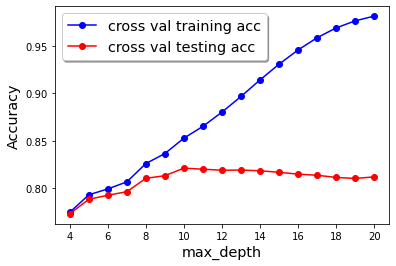

In [33]:
plt.plot(depth_range, cross_val_train, 'bo-', label ='cross val training acc')
plt.plot(depth_range, cross_val_test, 'ro-', label = 'cross val testing acc')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [34]:
leaf_range = range(1,10)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in leaf_range:
    # Create Random Forest Model
    rf_reg = RandomForestClassifier(criterion = 'gini', max_depth = 10, max_features = None, min_samples_leaf = d, min_samples_split = 5, n_estimators=150, random_state = 6, n_jobs = -1)
    rf_reg.fit(x_train, y_train.ravel()) 
    train_acc.append(accuracy_score(rf_reg.predict(x_train), y_train))
    test_acc.append(accuracy_score(rf_reg.predict(x_test), y_test))
    
    results  = cross_validate(rf_reg, x_data, y_data.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))


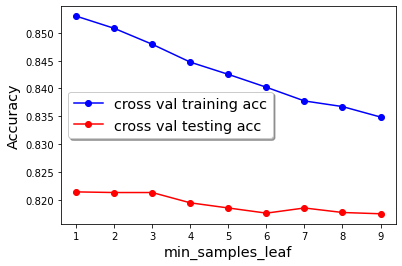

In [35]:
plt.plot(leaf_range, cross_val_train, 'bo-', label ='cross val training acc')
plt.plot(leaf_range, cross_val_test, 'ro-', label = 'cross val testing acc')

plt.xlabel('min_samples_leaf', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [36]:
split_range = range(2,10)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in split_range:
    # Create Random Forest Model
    rf_reg = RandomForestClassifier(criterion = 'gini', max_depth = 10, max_features = None, min_samples_leaf = 3, min_samples_split = d, n_estimators=150, random_state = 6, n_jobs = -1)
    rf_reg.fit(x_train, y_train.ravel()) 
    train_acc.append(accuracy_score(rf_reg.predict(x_train), y_train))
    test_acc.append(accuracy_score(rf_reg.predict(x_test), y_test))
    
    results  = cross_validate(rf_reg, x_data, y_data.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))


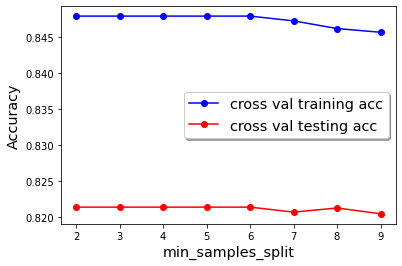

In [37]:
plt.plot(split_range, cross_val_train, 'bo-', label ='cross val training acc')
plt.plot(split_range, cross_val_test, 'ro-', label = 'cross val testing acc')

plt.xlabel('min_samples_split', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [53]:

n_range = range(140,160)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in n_range:
    # Create Random Forest Model
    rf_reg = RandomForestClassifier(criterion = 'gini', max_depth = 10, max_features = None, min_samples_leaf = 3, min_samples_split = 6, n_estimators=d, random_state = 6, n_jobs = -1)
    rf_reg.fit(x_train, y_train.ravel()) 
    train_acc.append(accuracy_score(rf_reg.predict(x_train), y_train))
    test_acc.append(accuracy_score(rf_reg.predict(x_test), y_test))
    
    results  = cross_validate(rf_reg, x_data, y_data.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))
    

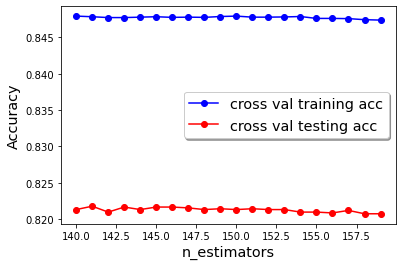

In [54]:
plt.plot(n_range, cross_val_train, 'bo-', label ='cross val training acc')
plt.plot(n_range, cross_val_test, 'ro-', label = 'cross val testing acc')

plt.xlabel('n_estimators', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [96]:
rf = RandomForestClassifier(criterion = 'gini', max_depth = 10, max_features = None, min_samples_leaf = 3,
                            min_samples_split = 6, n_estimators=141, random_state = 6, n_jobs = -1)
rf.fit(x_train,y_train)
results  = cross_validate(rf, x_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.85027433 0.84796419 0.84579844 0.84495453 0.85015158]
test_score:  [0.80831409 0.8169746  0.82621247 0.83073368 0.82668977]
cross val training accuracy is: 0.8478286137422311
cross val testing accuracy is: 0.8217849218769805


In [39]:
pd.concat((pd.DataFrame(x_train.columns, columns = ['feature']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,feature,importance
10,avg_training_score,0.293027
8,KPIs_met >80%,0.241356
0,department,0.208994
6,previous_year_rating,0.120181
5,age,0.035561
1,region,0.030470
7,length_of_service,0.028403
9,awards_won?,0.025861
2,education,0.006832
3,gender,0.004739


XGBoost

In [51]:

xgb = XGBClassifier(random_state = 6)

param_grid = { "n_estimators" : [200,400,700],
            "max_depth": [1,5,10,15],
            "min_child_weight": [1,5,10],
            "gamma": [10,1,0.1],
            "subsample": [0.4,0.6,0.8],
            "colsample_bytree": [0.4,0.6,0.8],
             "learning_rate": [0.01,0.1]}


gs = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(x_data, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.8253652656422819
{'colsample_bytree': 0.8, 'gamma': 10, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 700, 'subsample': 0.8}


In [52]:
gamma_range = range(5,15)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in gamma_range:
    xgb = XGBClassifier( gamma = d, subsample =0.8, max_depth = 10, min_child_weight = 5, colsample_bytree = 0.8, learning_rate = 0.1, random_state = 6)
    xgb.fit(x_train, y_train.ravel()) 
    train_acc.append(accuracy_score(xgb.predict(x_train), y_train))
    test_acc.append(accuracy_score(xgb.predict(x_test), y_test))
    
    results  = cross_validate(xgb, x_data, y_data.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))


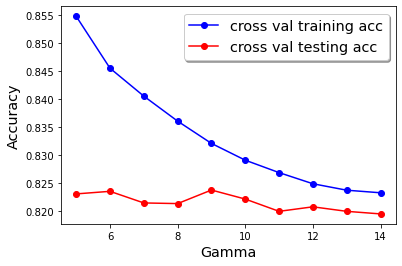

In [53]:
plt.plot(gamma_range, cross_val_train, 'bo-', label ='cross val training acc')
plt.plot(gamma_range, cross_val_test, 'ro-', label = 'cross val testing acc')

plt.xlabel('Gamma', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [54]:
depth_range = range(6,20)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in depth_range:
    xgb = XGBClassifier(gamma = 9, subsample =0.8, max_depth = d, min_child_weight = 5, colsample_bytree = 0.8, learning_rate = 0.1, random_state = 6)
    xgb.fit(x_train, y_train.ravel()) 
    train_acc.append(accuracy_score(xgb.predict(x_train), y_train))
    test_acc.append(accuracy_score(xgb.predict(x_test), y_test))
    
    results  = cross_validate(xgb, x_data, y_data.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))


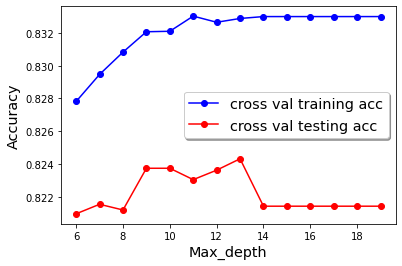

In [55]:
plt.plot(depth_range, cross_val_train, 'bo-', label ='cross val training acc')
plt.plot(depth_range, cross_val_test, 'ro-', label = 'cross val testing acc')

plt.xlabel('Max_depth', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [56]:
weight_range = range(1,10)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in weight_range:
    xgb = XGBClassifier(gamma = 9, subsample =0.8, max_depth = 13, min_child_weight = d, colsample_bytree = 0.8, learning_rate = 0.1, random_state = 6)
    xgb.fit(x_train, y_train.ravel()) 
    train_acc.append(accuracy_score(xgb.predict(x_train), y_train))
    test_acc.append(accuracy_score(xgb.predict(x_test), y_test))
    
    results  = cross_validate(xgb, x_data, y_data.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))


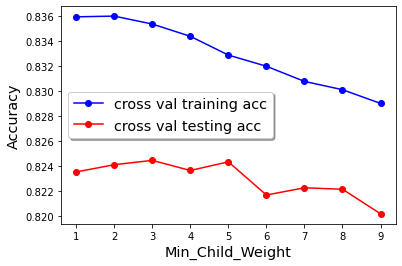

In [57]:
plt.plot(weight_range, cross_val_train, 'bo-', label ='cross val training acc')
plt.plot(weight_range, cross_val_test, 'ro-', label = 'cross val testing acc')

plt.xlabel('Min_Child_Weight', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [58]:
subsample_range = [0.5,0.6,0.7,0.8,0.9,1]

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in subsample_range:
    xgb = XGBClassifier(gamma = 9, subsample =d, max_depth = 13, min_child_weight = 5, colsample_bytree = 0.8, learning_rate = 0.1, random_state = 6)
    xgb.fit(x_train, y_train.ravel()) 
    train_acc.append(accuracy_score(xgb.predict(x_train), y_train))
    test_acc.append(accuracy_score(xgb.predict(x_test), y_test))
    
    results  = cross_validate(xgb, x_data, y_data.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))

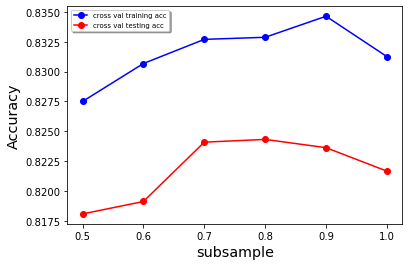

In [59]:
plt.plot(subsample_range, cross_val_train, 'bo-', label ='cross val training acc')
plt.plot(subsample_range, cross_val_test, 'ro-', label = 'cross val testing acc')

plt.xlabel('subsample', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-small')
plt.show()

In [60]:
colsample_range = np.arange(0.5,1,0.1)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in colsample_range:
    xgb = XGBClassifier(gamma = 9, subsample = 0.8, max_depth = 13, min_child_weight = 5, colsample_bytree = d, learning_rate = 0.1, random_state = 6)
    xgb.fit(x_train, y_train.ravel()) 
    train_acc.append(accuracy_score(xgb.predict(x_train), y_train))
    test_acc.append(accuracy_score(xgb.predict(x_test), y_test))
    
    results  = cross_validate(xgb, x_data, y_data.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))

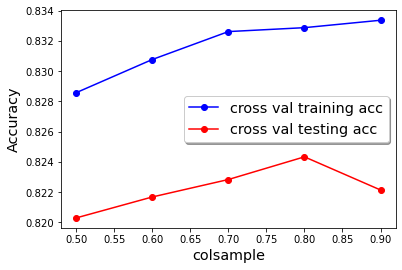

In [61]:
plt.plot(colsample_range, cross_val_train, 'bo-', label ='cross val training acc')
plt.plot(colsample_range, cross_val_test, 'ro-', label = 'cross val testing acc')

plt.xlabel('colsample', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [15]:
learning_range = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in learning_range:
    xgb = XGBClassifier(gamma = 9, subsample = 0.8, max_depth = 13, min_child_weight = 5, colsample_bytree = 0.8, learning_rate = d, random_state = 6)
    xgb.fit(x_train, y_train.ravel()) 
    train_acc.append(accuracy_score(xgb.predict(x_train), y_train))
    test_acc.append(accuracy_score(xgb.predict(x_test), y_test))
    
    results  = cross_validate(xgb, x_data, y_data.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))

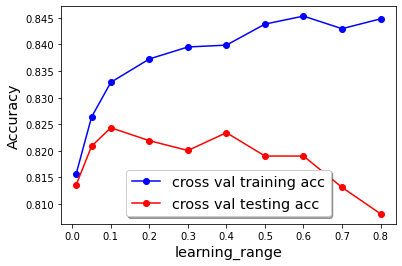

In [16]:
plt.plot(learning_range, cross_val_train, 'bo-', label ='cross val training acc')
plt.plot(learning_range, cross_val_test, 'ro-', label = 'cross val testing acc')

plt.xlabel('learning_range', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [62]:

xgb = XGBClassifier(max_depth = 13, min_child_weight = 5, subsample = 0.8, colsample_bytree = 0.8, gamma = 9, learning_rate = 0.1, random_state = 6)

param_grid = { "n_estimators" : [100,150,600,700,750,800,850,900,1000]}


gs = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(x_data, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.8254808057924841
{'n_estimators': 750}


In [90]:

xgb = XGBClassifier(max_depth = 13, min_child_weight = 5, subsample = 0.8, colsample_bytree = 0.8, gamma = 9, learning_rate = 0.1, random_state = 6)

param_grid = { "n_estimators" : [730,740,750,760,770]}


gs = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(x_data, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.8254808057924841
{'n_estimators': 750}


In [91]:
n_range = range(740,760)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in n_range:
    xgb = XGBClassifier(gamma = 9, subsample = 0.8, max_depth = 13, min_child_weight = 5, colsample_bytree = 0.8, learning_rate = 0.1 , random_state = 6, n_estimator = d)
    xgb.fit(x_train, y_train.ravel()) 
    train_acc.append(accuracy_score(xgb.predict(x_train), y_train))
    test_acc.append(accuracy_score(xgb.predict(x_test), y_test))
    
    results  = cross_validate(xgb, x_data, y_data.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))

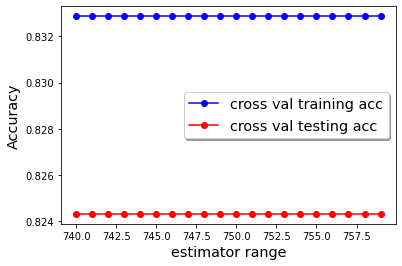

In [92]:
plt.plot(n_range, cross_val_train, 'bo-', label ='cross val training acc')
plt.plot(n_range, cross_val_test, 'ro-', label = 'cross val testing acc')

plt.xlabel('estimator range', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [20]:
xgb = XGBClassifier(n_estimators = 750,max_depth = 13, min_child_weight = 5, subsample = 0.8, colsample_bytree = 0.8,
                    gamma = 9, learning_rate = 0.1, random_state = 6)
xgb.fit(x_train,y_train)
results  = cross_validate(xgb, x_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.84334392 0.84334392 0.84449899 0.84192291 0.84726433]
test_score:  [0.8187067  0.81928406 0.8256351  0.84055459 0.82322357]
cross val training accuracy is: 0.844074814113822
cross val testing accuracy is: 0.8254808057924841


In [64]:
pd.concat((pd.DataFrame(x_train.columns, columns = ['feature']), 
           pd.DataFrame(xgb.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,feature,importance
8,KPIs_met >80%,0.408471
6,previous_year_rating,0.128788
10,avg_training_score,0.121908
9,awards_won?,0.103404
0,department,0.099669
4,no_of_trainings,0.027638
5,age,0.024793
1,region,0.024747
7,length_of_service,0.024599
2,education,0.019307


Scaling

In [96]:
# Load dataset into a DataFrame
df = pd.read_csv('hr_data_new.csv')

# Create a copy of the DataFrame
df_scaled_hr = df.copy()

# Show overview of the dataset
df_scaled_hr.head()

,department,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,9,7,3,0,1,35,5.0,3,1,0,50,1
1,9,28,3,1,1,33,5.0,6,1,0,51,1
2,9,4,2,1,1,50,4.0,17,1,0,47,1
3,5,31,3,1,1,30,3.0,7,1,0,84,1
4,6,22,2,1,1,34,5.0,7,1,0,78,1


In [104]:
df_scaled_hr["department"] = (df_scaled_hr["department"] - df_scaled_hr["department"].min()) / (df_scaled_hr["department"].max()-df_scaled_hr["department"].min())
df_scaled_hr["region"] = (df_scaled_hr["region"] - df_scaled_hr["region"].min()) / (df_scaled_hr["region"].max()-df_scaled_hr["region"].min())
df_scaled_hr["education"] = (df_scaled_hr["education"] - df_scaled_hr["education"].min()) / (df_scaled_hr["education"].max()-df_scaled_hr["education"].min())
df_scaled_hr["no_of_trainings"] = (df_scaled_hr["no_of_trainings"] - df_scaled_hr["no_of_trainings"].min()) / (df_scaled_hr["no_of_trainings"].max()-df_scaled_hr["no_of_trainings"].min())
df_scaled_hr["age"] = (df_scaled_hr["age"] - df_scaled_hr["age"].min()) / (df_scaled_hr["age"].max()-df_scaled_hr["age"].min())
df_scaled_hr["previous_year_rating"] = (df_scaled_hr["previous_year_rating"] - df_scaled_hr["previous_year_rating"].min()) / (df_scaled_hr["previous_year_rating"].max()-df_scaled_hr["previous_year_rating"].min())
df_scaled_hr["length_of_service"] = (df_scaled_hr["length_of_service"] - df_scaled_hr["length_of_service"].min()) / (df_scaled_hr["length_of_service"].max()-df_scaled_hr["length_of_service"].min())
df_scaled_hr["avg_training_score"] = (df_scaled_hr["avg_training_score"] - df_scaled_hr["avg_training_score"].min()) / (df_scaled_hr["avg_training_score"].max()-df_scaled_hr["avg_training_score"].min())

In [105]:
y_scaled_data = df_scaled_hr['is_promoted']
x_scaled_data = df_scaled_hr.drop(['is_promoted'], axis = 1)

In [106]:
x_scaled_train, x_scaled_test, y_scaled_train, y_scaled_test = train_test_split(x_scaled_data, y_scaled_data, test_size=0.33, random_state=6)
#test data

In [107]:
rf = RandomForestClassifier(criterion = 'gini', max_depth = 10, max_features = None, min_samples_leaf = 3, min_samples_split = 6, n_estimators=150, random_state = 6, n_jobs = -1)
rf.fit(x_scaled_train,y_scaled_train)
results  = cross_validate(rf, x_scaled_data, y_scaled_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.85012995 0.84810858 0.84550967 0.84553198 0.85044031]
test_score:  [0.80831409 0.81408776 0.82736721 0.83073368 0.82553437]
cross val training accuracy is: 0.8479440955159581
cross val testing accuracy is: 0.8212074212532503


In [108]:
xgb = XGBClassifier(n_estimators = 750,max_depth = 13, min_child_weight = 5, subsample = 0.8, colsample_bytree = 0.8, gamma = 9, learning_rate = 0.1, random_state = 6)
xgb.fit(x_scaled_train,y_scaled_train)
results  = cross_validate(xgb, x_scaled_data, y_scaled_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.84334392 0.84334392 0.84449899 0.84192291 0.84726433]
test_score:  [0.8187067  0.81928406 0.8256351  0.84055459 0.82322357]
cross val training accuracy is: 0.844074814113822
cross val testing accuracy is: 0.8254808057924841


In [46]:
mlp = MLPClassifier(random_state =6)
mlp.fit(x_scaled_train,y_scaled_train)
results  = cross_validate(mlp, x_scaled_data, y_scaled_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

F:\school\anaconda\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\school\anaconda\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\school\anaconda\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\school\anaconda\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

train_score:  [0.82154202 0.81692174 0.81013572 0.81550455 0.81694817]
test_score:  [0.78579677 0.79734411 0.80369515 0.80820335 0.80935875]
cross val training accuracy is: 0.8162104402910415
cross val testing accuracy is: 0.8008796261088719


F:\school\anaconda\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [39]:
xgb = XGBClassifier(n_estimators = 750,max_depth = 13, min_child_weight = 5, subsample = 0.8, colsample_bytree = 0.8, gamma = 9, learning_rate = 0.1, random_state = 6)
xgb.fit(x_scaled_train,y_scaled_train)
results  = cross_validate(xgb, x_scaled_data, y_scaled_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.84334392 0.84334392 0.84449899 0.84192291 0.84726433]
test_score:  [0.8187067  0.81928406 0.8256351  0.84055459 0.82322357]
cross val training accuracy is: 0.844074814113822
cross val testing accuracy is: 0.8254808057924841


SVC

In [20]:
svclassifier = SVC(random_state = 6)
svclassifier.fit(x_scaled_train,y_scaled_train)

SVC(random_state=6)

In [21]:
results  = cross_validate(svclassifier, x_scaled_data, y_scaled_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.79829627 0.79771874 0.80002888 0.7967374  0.79976902]
test_score:  [0.77655889 0.80080831 0.80484988 0.80069324 0.79202773]
cross val training accuracy is: 0.7985100633432245
cross val testing accuracy is: 0.7949876121213092


In [40]:

svclassifier = SVC(random_state = 6)

param_grid = { "C" : [1,10,100,1000],
              "kernel": ['rbf','poly','sigmoid'],
              "class_weight": ['balanced', None]}


gs = GridSearchCV(estimator=svclassifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(x_scaled_data, y_scaled_data)
print(gs.best_score_)
print(gs.best_params_)

0.8113894436861843
{'C': 100, 'class_weight': 'balanced', 'kernel': 'rbf'}


In [47]:
svclassifier = SVC(random_state = 6, kernel = 'rbf', class_weight = 'balanced' )

param_grid = { "C" : [50,100,150],
              'gamma': [1000,100,10,1,0.1,0.01,0.001,0.0001,'scale','auto']}


gs = GridSearchCV(estimator=svclassifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(x_scaled_data, y_scaled_data)
print(gs.best_score_)
print(gs.best_params_)

0.8116207241138698
{'C': 50, 'gamma': 'scale'}


In [50]:
svclassifier = SVC(random_state = 6, kernel = 'rbf', class_weight = 'balanced', gamma = 'scale' )

param_grid = { "C" : [10,20,30,40,50,60,70,80,90]}


gs = GridSearchCV(estimator=svclassifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(x_scaled_data, y_scaled_data)
print(gs.best_score_)
print(gs.best_params_)

0.8119669443099145
{'C': 60}


In [45]:
svc = SVC(C=100, kernel = 'rbf', gamma = 1, class_weight = 'balanced', random_state = 6)
svc.fit(x_scaled_train,y_scaled_train)
results  = cross_validate(svc, x_scaled_data, y_scaled_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.86081432 0.85619405 0.85446145 0.85044031 0.85621481]
test_score:  [0.78983834 0.80023095 0.81408776 0.81744656 0.81455806]
cross val training accuracy is: 0.8556249883015404
cross val testing accuracy is: 0.807232333097183


In [51]:
C_range = range(55,65)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in C_range:
    # Create SVC
    svc = SVC(C=d, kernel = 'rbf', gamma = 'scale', class_weight = 'balanced')
    svc.fit(x_scaled_train, y_scaled_train.ravel()) 
    train_acc.append(accuracy_score(svc.predict(x_train), y_train))
    test_acc.append(accuracy_score(svc.predict(x_test), y_test))
    
    results  = cross_validate(svc, x_scaled_data, y_scaled_data.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))


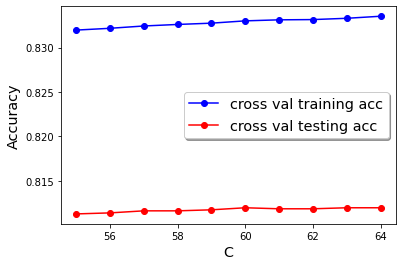

In [52]:
plt.plot(C_range, cross_val_train, 'bo-', label ='cross val training acc')
plt.plot(C_range, cross_val_test, 'ro-', label = 'cross val testing acc')

plt.xlabel('C', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [53]:
svc = SVC(C=60, kernel = 'rbf', gamma = 'scale',class_weight = 'balanced', random_state = 6)
svc.fit(x_scaled_train,y_scaled_train)
results  = cross_validate(svc, x_scaled_data, y_scaled_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.83684666 0.83179324 0.83237078 0.83008517 0.83398297]
test_score:  [0.79965358 0.81293303 0.81351039 0.82553437 0.80820335]
cross val training accuracy is: 0.8330157647086583
cross val testing accuracy is: 0.8119669443099145


voting classifier

In [46]:
svc = SVC(C=60, kernel = 'rbf', gamma = 'scale',class_weight = 'balanced', random_state = 6)
xgb = XGBClassifier(n_estimators = 750,max_depth = 13, min_child_weight = 5, subsample = 0.8, colsample_bytree = 0.8, gamma = 9, learning_rate = 0.1, random_state = 6)
rf = RandomForestClassifier(criterion = 'gini', max_depth = 10, max_features = None, min_samples_leaf = 3, min_samples_split = 6, n_estimators=150, random_state = 6, n_jobs = -1)

In [47]:
evc = VotingClassifier(estimators = [('xgb', xgb),('svc',svc),('rf', rf)], voting = 'hard')

In [48]:
evc.fit(x_train,y_train)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(colsample_bytree=0.8, gamma=9,
                                            max_depth=13, min_child_weight=5,
                                            n_estimators=750, random_state=6,
                                            subsample=0.8)),
                             ('svc',
                              SVC(C=60, class_weight='balanced',
                                  random_state=6)),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     max_features=None,
                                                     min_samples_leaf=3,
                                                     min_samples_split=6,
                                                     n_estimators=150,
                                                     n_jobs=-1,
                                                     random_

In [49]:
print("The training accuracy is", evc.score(x_train,y_train))
print("The testing accuracy is", evc.score(x_test, y_test))

The training accuracy is 0.8422413793103448
The testing accuracy is 0.8243526941917425


## 2. Airbnb Singapore

### 2.1 Load and Sample the data

In [10]:
# Load dataset into a DataFrame
df = pd.read_csv('listings_new.csv')

# Create a copy of the DataFrame
df_list = df.copy()

# Show overview of the dataset
df_list.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,7,1.33235,103.78521,2,81,2.0,18,1,0.28,1,365
1,14,1.28875,103.80814,2,44,15.0,18,1,0.23,32,331
2,14,1.28837,103.81099,2,40,2.0,10,1,0.11,32,276
3,6,1.31125,103.83816,2,65,2.0,125,1,1.35,6,336
4,14,1.28976,103.80896,2,44,2.0,13,1,0.15,32,340


In [11]:
y_list = df_list['price']
x_list = df_list.drop(['price'], axis = 1)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_list, y_list, test_size=0.33, random_state=6)
#test data

### 2.2 Build the Model(s)

Decision Tree

In [85]:
decision_tree = DecisionTreeRegressor(random_state = 6)
decision_tree.fit(x_train, y_train.ravel())

# Evaluate the Model using K-folds Cross validation
results  = (cross_validate(decision_tree, x_list, y_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True))
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-0. -0. -0. -0. -0.]
test_score:  [-75.44036966 -74.56871268 -74.45218896 -80.05503216 -79.8577826 ]
cross val training root mean squared error (RMSE) is: 0.0
cross val testing root mean squared error (RMSE) is: 76.8748172112448


Linear Regression

In [87]:
lg = LinearRegression()
lg.fit(x_train,y_train.ravel())

# Evaluate the Model using K-folds Cross validation
results  = (cross_validate(lg, x_list, y_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True))
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-67.27789001 -66.58757559 -65.80087962 -64.76052557 -65.33363098]
test_score:  [-61.43355025 -63.95575919 -67.16590403 -71.30979501 -68.93044306]
cross val training root mean squared error (RMSE) is: 65.952100352966
cross val testing root mean squared error (RMSE) is: 66.55909030856908


adaboost

In [45]:
adb = AdaBoostRegressor(random_state = 6)
adb.fit(x_train,y_train.ravel())

# Evaluate the Model using K-folds Cross validation
results  = (cross_validate(adb, x_list, y_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True))
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-67.22505655 -66.6281162  -66.19333434 -66.43076429 -67.31155354]
test_score:  [-66.98294357 -68.55590336 -66.53166583 -71.94517149 -70.2579021 ]
cross val training root mean squared error (RMSE) is: 66.75776498602632
cross val testing root mean squared error (RMSE) is: 68.85471726785622


Random Forest

In [89]:
# Create Random Forest Model
rf_reg = RandomForestRegressor(random_state = 6)
# Y_train is a 1D array, use ravel() to change the shape of Y_train to (n_samples,) before feed it into fit function
rf_reg.fit(x_train, y_train.ravel()) 

# Evaluate the Model using K-folds Cross validation
results  = (cross_validate(rf_reg, x_list, y_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True))
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-18.43569181 -18.33274456 -18.32026833 -17.95573069 -18.1378978 ]
test_score:  [-53.54040917 -53.90357526 -54.500251   -59.99246376 -58.87565732]
cross val training root mean squared error (RMSE) is: 18.236466639422684
cross val testing root mean squared error (RMSE) is: 56.16247130326134


XGBoost

In [95]:
xgbr = XGBRegressor(random_state = 6)
xgbr.fit(x_train,y_train.ravel())

results  = (cross_validate(xgbr, x_list, y_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True))
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

[16:01:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:01:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:01:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:01:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:01:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train_score:  [-54.33664369 -53.87647498 -53.45702323 -52.8637003  -53.33673768]
test_score:  [-54.06087921 -58.60260517 -58.97397712 -63.19227144 -61.54794712]
cross val training root mean squared error (RMSE) is: 53.5741159751765
cross val testing root mean squared error (RMSE) is: 59.27553601119431


In [8]:
mlp = MLPRegressor(random_state =6)
mlp.fit(x_train,y_train.ravel())

# Evaluate the Model using K-folds Cross validation
results  = (cross_validate(mlp, x_list, y_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True))
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

F:\school\anaconda\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\school\anaconda\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\school\anaconda\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\school\anaconda\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

train_score:  [-64.5403494  -63.39156507 -62.47164164 -61.74762234 -62.29032307]
test_score:  [-60.74025224 -62.04036246 -65.84233332 -69.2239394  -67.72303999]
cross val training root mean squared error (RMSE) is: 62.88830030401816
cross val testing root mean squared error (RMSE) is: 65.11398548164912


F:\school\anaconda\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [9]:
svr = SVR()
svr.fit(x_train,y_train.ravel())
results  = (cross_validate(svr, x_list, y_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True))
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-86.00051196 -84.66561209 -84.85804834 -84.97434627 -83.78717259]
test_score:  [-76.20986477 -83.25910192 -87.70240508 -86.73057002 -93.39742697]
cross val training root mean squared error (RMSE) is: 84.85713825128315
cross val testing root mean squared error (RMSE) is: 85.45987375183971


### 2.3 Evaluate and Improve the Model(s)

Random Forest

In [99]:
rf = RandomForestRegressor(random_state = 6, n_jobs=-1)

param_grid = {"n_estimators": [200, 500, 750],
              "max_depth": [5, 10, 15], 
              "min_samples_leaf" : [1, 5, 10], 
              "min_samples_split": [1, 5 ,10],
              "max_features": ["auto" "sqrt", "log2",None]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(x_list, y_list)
print(gs.best_score_)
print(gs.best_params_)

-55.20402661757871
{'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 750}


In [100]:
rf = RandomForestRegressor(random_state = 6, n_jobs=-1, max_features = 'log2', min_samples_split = 5, min_samples_leaf = 1)

param_grid = {"n_estimators": [750,1000,1250],
              "max_depth": [12,15,18,21]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(x_list, y_list)
print(gs.best_score_)
print(gs.best_params_)

-55.10612397871862
{'max_depth': 21, 'n_estimators': 1000}


In [46]:
rf = RandomForestRegressor(random_state = 6, n_jobs=-1, max_features = 'log2', min_samples_split = 5, min_samples_leaf = 1)

param_grid = {"n_estimators": [900,1000,1100],
             "max_depth": [20,21,22,25]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(x_list, y_list)
print(gs.best_score_)
print(gs.best_params_)

-55.07126477389183
{'max_depth': 25, 'n_estimators': 900}


In [48]:
rf = RandomForestRegressor(random_state = 6, n_jobs=-1, max_features = 'log2', min_samples_split = 5, min_samples_leaf = 1)

param_grid = {"n_estimators": [850,900,950],
             "max_depth": [25,28,31]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(x_list, y_list)
print(gs.best_score_)
print(gs.best_params_)

-55.05899847585988
{'max_depth': 25, 'n_estimators': 950}


In [49]:
rf = RandomForestRegressor(random_state = 6, n_jobs=-1, max_features = 'log2', min_samples_split = 5, min_samples_leaf = 1, max_depth = 25)

param_grid = {"n_estimators": [930,940,950,960,970]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(x_list, y_list)
print(gs.best_score_)
print(gs.best_params_)

-55.05899847585988
{'n_estimators': 950}


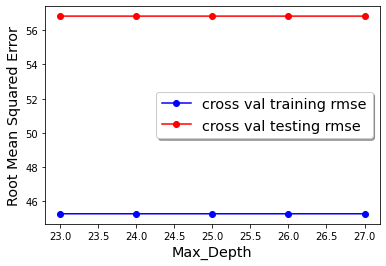

In [7]:
depth_range = range(23,28)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in depth_range:
    rf = RandomForestRegressor(random_state = 6, n_jobs=-1, max_features = 'log2', min_samples_split = 5, min_samples_leaf = 9, max_depth = d, n_estimators = 950)
    rf.fit(x_train, y_train.ravel()) 
    train_acc.append(sqrt(mean_squared_error(rf.predict(x_train), y_train.ravel())))
    test_acc.append(sqrt(mean_squared_error(rf.predict(x_test), y_test.ravel())))
    
    results  = cross_validate(rf, x_list, y_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))


plt.plot(depth_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(depth_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('Max_Depth', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

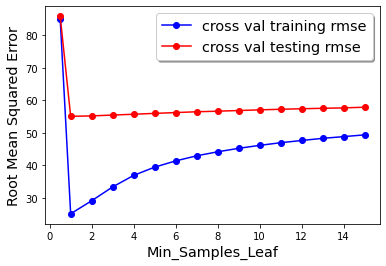

In [9]:
leaf_range = [0.5,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in leaf_range:
    rf = RandomForestRegressor(random_state = 6, n_jobs=-1, max_features = 'log2', min_samples_split = 5,
                               min_samples_leaf = d, max_depth = 25, n_estimators = 950)
    rf.fit(x_train, y_train.ravel()) 
    train_acc.append(sqrt(mean_squared_error(rf.predict(x_train), y_train.ravel())))
    test_acc.append(sqrt(mean_squared_error(rf.predict(x_test), y_test.ravel())))
    
    results  = cross_validate(rf, x_list, y_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))


plt.plot(leaf_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(leaf_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('Min_Samples_Leaf', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

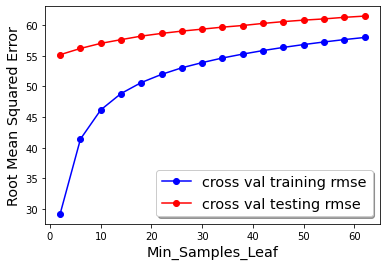

In [15]:
leaf_range = range(2,65,4)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in leaf_range:
    rf = RandomForestRegressor(random_state = 6, n_jobs=-1, max_features = 'log2', min_samples_split = 5,
                               min_samples_leaf = d, max_depth = 25, n_estimators = 950)
    rf.fit(x_train, y_train.ravel()) 
    train_acc.append(sqrt(mean_squared_error(rf.predict(x_train), y_train.ravel())))
    test_acc.append(sqrt(mean_squared_error(rf.predict(x_test), y_test.ravel())))
    
    results  = cross_validate(rf, x_list, y_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))

plt.plot(leaf_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(leaf_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('Min_Samples_Leaf', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [72]:
# Create Random Forest Model
rf_reg = RandomForestRegressor(random_state = 6, n_jobs=-1, max_features = 'log2', min_samples_split = 5, min_samples_leaf = 64, max_depth = 25, n_estimators = 950)
# Y_train is a 1D array, use ravel() to change the shape of Y_train to (n_samples,) before feed it into fit function
rf_reg.fit(x_train, y_train.ravel())
results  = (cross_validate(rf_reg, x_list, y_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True))
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-59.16999705 -58.29201806 -57.9923426  -57.53296181 -57.77414892]
test_score:  [-55.8445374  -61.75583396 -61.7983576  -64.61378622 -63.91939271]
cross val training root mean squared error (RMSE) is: 58.15229368712254
cross val testing root mean squared error (RMSE) is: 61.58638157909354


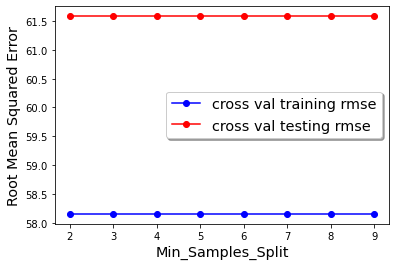

In [13]:
split_range = range(2,10)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in split_range:
    rf = RandomForestRegressor(random_state = 6, n_jobs=-1, max_features = 'log2', min_samples_split = d,
                               min_samples_leaf = 64, max_depth = 25, n_estimators = 950)
    rf.fit(x_train, y_train.ravel()) 
    train_acc.append(sqrt(mean_squared_error(rf.predict(x_train), y_train.ravel())))
    test_acc.append(sqrt(mean_squared_error(rf.predict(x_test), y_test.ravel())))
    
    results  = cross_validate(rf, x_list, y_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))


plt.plot(split_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(split_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('Min_Samples_Split', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

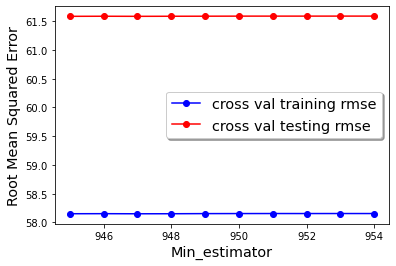

In [15]:
estimator_range = range(945,955)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in estimator_range:
    rf = RandomForestRegressor(random_state = 6, n_jobs=-1, max_features = 'log2', min_samples_split = 5,
                               min_samples_leaf = 64, max_depth = 25, n_estimators = d)
    rf.fit(x_train, y_train.ravel()) 
    train_acc.append(sqrt(mean_squared_error(rf.predict(x_train), y_train.ravel())))
    test_acc.append(sqrt(mean_squared_error(rf.predict(x_test), y_test.ravel())))
    
    results  = cross_validate(rf, x_list, y_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))


plt.plot(estimator_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(estimator_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('Min_estimator', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [78]:
# Create Random Forest Model
rf_reg = RandomForestRegressor(random_state = 6, n_jobs=-1, max_features = 'log2', min_samples_split = 5,
                               min_samples_leaf = 64, max_depth = 25, n_estimators = 950)
# Y_train is a 1D array, use ravel() to change the shape of Y_train to (n_samples,) before feed it into fit function
rf_reg.fit(x_train, y_train.ravel()) 

# Evaluate the Model using K-folds Cross validation
# Create Random Forest Model
rf_reg = RandomForestRegressor(random_state = 6, n_jobs=-1, max_features = 'log2', min_samples_split = 5,
                               min_samples_leaf = 64, max_depth = 25, n_estimators = 950)
# Y_train is a 1D array, use ravel() to change the shape of Y_train to (n_samples,) before feed it into fit function
rf_reg.fit(x_train, y_train.ravel()) 
results  = (cross_validate(rf_reg, x_list, y_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True))
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-59.16999705 -58.29201806 -57.9923426  -57.53296181 -57.77414892]
test_score:  [-55.8445374  -61.75583396 -61.7983576  -64.61378622 -63.91939271]
cross val training root mean squared error (RMSE) is: 58.15229368712254
cross val testing root mean squared error (RMSE) is: 61.58638157909354


XGBOOST

In [112]:

xgb = XGBRegressor(random_state = 6)

param_grid = { "n_estimators" : [200,400,700],
            "max_depth": [1,5,10,15],
            "min_child_weight": [1,5,10],
            "gamma": [10,1,0.1,0.01],
            "subsample": [0.4,0.6,0.8],
            "colsample_bytree": [0.4,0.6,0.8],
            "learning_rate": [0.01,0.1]}


gs = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(x_list, y_list)
print(gs.best_score_)
print(gs.best_params_)

[17:19:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
-54.679361450172465
{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 700, 'subsample': 0.6}


In [113]:
xgb = XGBRegressor(random_state = 6, max_depth = 10, min_child_weight = 5)

param_grid = { "n_estimators" : [700,1000,1250],
            "gamma": [0.01,0.001],
            "subsample": [0.6,1],
            "colsample_bytree": [0.8,1],
            "learning_rate": [0.01,0.001]}


gs = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(x_list, y_list)
print(gs.best_score_)
print(gs.best_params_)

[17:22:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
-54.69728071631563
{'colsample_bytree': 0.8, 'gamma': 0.01, 'learning_rate': 0.01, 'n_estimators': 700, 'subsample': 0.6}


In [81]:
xgb = XGBRegressor(random_state = 6, max_depth = 10, min_child_weight = 5, gamma = 0.01,
                   learning_rate = 0.01, subsample = 0.6, colsample_bytree = 0.8)

param_grid = { "n_estimators" : [500,550,575,585,595,600,605,615,625,650]}

gs = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(x_list, y_list)
print(gs.best_score_)
print(gs.best_params_)

[23:43:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
-54.68352006110014
{'n_estimators': 605}


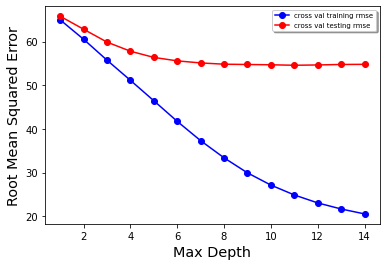

In [17]:
depth_range = range(1,15)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in depth_range:
    xgb = XGBRegressor(random_state = 6, n_estimators = 605, max_depth = d, min_child_weight = 5,
                       gamma = 0.01, learning_rate = 0.01, subsample = 0.6, colsample_bytree = 0.8, objective = 'reg:squarederror')
    xgb.fit(x_train, y_train.ravel()) 
    train_acc.append(sqrt(mean_squared_error(xgb.predict(x_train), y_train.ravel())))
    test_acc.append(sqrt(mean_squared_error(xgb.predict(x_test), y_test.ravel())))
    
    results  = cross_validate(xgb, x_list, y_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))

plt.plot(depth_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(depth_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('Max Depth', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-small')
plt.show()

In [92]:
xgb = XGBRegressor(random_state = 6, n_estimators = 605, max_depth = 2, min_child_weight = 5, gamma = 0.01, learning_rate = 0.01, subsample = 0.6, colsample_bytree = 0.8, objective = 'reg:squarederror')
xgb.fit(x_train, y_train.ravel()) 
results  = cross_validate(xgb, x_list, y_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

cross val training root mean squared error (RMSE) is: 60.52639494663798
cross val testing root mean squared error (RMSE) is: 62.821865860314134


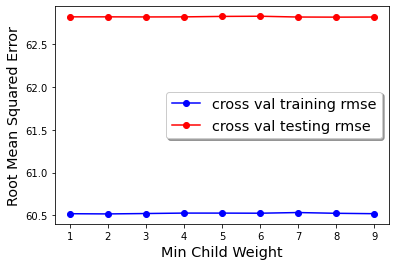

In [19]:
weight_range = range(1,10)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in weight_range:
    xgb = XGBRegressor(random_state = 6, n_estimators = 605, max_depth = 2 , min_child_weight = d, gamma = 0.01,
                       learning_rate = 0.01, subsample = 0.6, colsample_bytree = 0.8, objective = 'reg:squarederror')
    xgb.fit(x_train, y_train.ravel()) 
    train_acc.append(sqrt(mean_squared_error(xgb.predict(x_train), y_train.ravel())))
    test_acc.append(sqrt(mean_squared_error(xgb.predict(x_test), y_test.ravel())))
    
    results  = cross_validate(xgb, x_list, y_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))

plt.plot(weight_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(weight_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('Min Child Weight', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

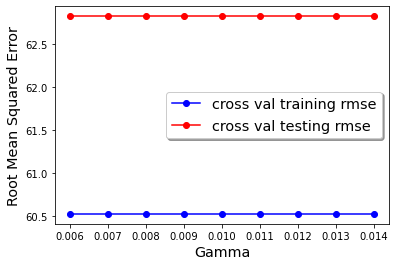

In [22]:
gamma_range = np.arange(0.006,0.015,0.001)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in gamma_range:
    xgb = XGBRegressor(random_state = 6, n_estimators = 605, max_depth = 2 , min_child_weight = 5, gamma = d,
                       learning_rate = 0.01, subsample = 0.6, colsample_bytree = 0.8, objective = 'reg:squarederror')
    xgb.fit(x_train, y_train.ravel()) 
    train_acc.append(sqrt(mean_squared_error(xgb.predict(x_train), y_train.ravel())))
    test_acc.append(sqrt(mean_squared_error(xgb.predict(x_test), y_test.ravel())))
    
    results  = cross_validate(xgb, x_list, y_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))

plt.plot(gamma_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(gamma_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('Gamma', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

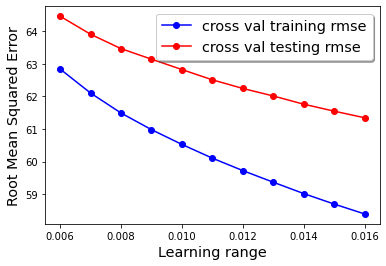

In [17]:
learning_range = np.arange(0.006,0.017,0.001)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in learning_range:
    xgb = XGBRegressor(random_state = 6, n_estimators = 605 ,max_depth = 2, min_child_weight = 5,gamma = 0.01,
                       learning_rate = d, subsample = 0.6, colsample_bytree = 0.8, objective = 'reg:squarederror')
    xgb.fit(x_train, y_train.ravel()) 
    train_acc.append(sqrt(mean_squared_error(xgb.predict(x_train), y_train.ravel())))
    test_acc.append(sqrt(mean_squared_error(xgb.predict(x_test), y_test.ravel())))
    
    results  = cross_validate(xgb, x_list, y_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))

plt.plot(learning_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(learning_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('Learning range', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [114]:
xgb = XGBRegressor(random_state = 6, n_estimators = 605, max_depth = 2, min_child_weight = 5, gamma = 0.01, learning_rate = 0.016, subsample = 0.6, colsample_bytree = 0.8, objective = 'reg:squarederror')
xgb.fit(x_train, y_train.ravel()) 
results  = cross_validate(xgb, x_list, y_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

cross val training root mean squared error (RMSE) is: 58.39549366643956
cross val testing root mean squared error (RMSE) is: 61.34415218914505


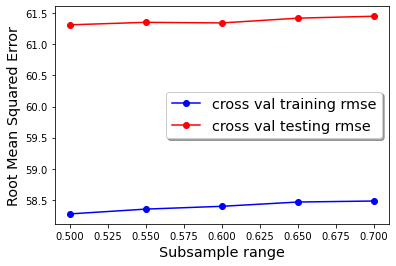

In [26]:
subsample_range = np.arange(0.5,0.71,0.05)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in subsample_range:
    xgb = XGBRegressor(random_state = 6, n_estimators = 605, max_depth = 2 , min_child_weight = 5, gamma = 0.01,
                       learning_rate = 0.016, subsample = d, colsample_bytree = 0.8, objective = 'reg:squarederror')
    xgb.fit(x_train, y_train.ravel()) 
    train_acc.append(sqrt(mean_squared_error(xgb.predict(x_train), y_train.ravel())))
    test_acc.append(sqrt(mean_squared_error(xgb.predict(x_test), y_test.ravel())))
    
    results  = cross_validate(xgb, x_list, y_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))

plt.plot(subsample_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(subsample_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('Subsample range', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

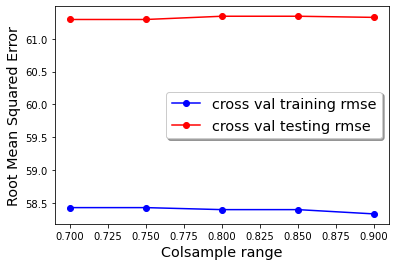

In [28]:
colsample_range = np.arange(0.7,0.91,0.05)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in colsample_range:
    xgb = XGBRegressor(random_state = 6, n_estimators = 605, max_depth = 2 , min_child_weight = 5, gamma = 0.01,
                       learning_rate = 0.016, subsample = 0.6, colsample_bytree = d, objective = 'reg:squarederror')
    xgb.fit(x_train, y_train.ravel()) 
    train_acc.append(sqrt(mean_squared_error(xgb.predict(x_train), y_train.ravel())))
    test_acc.append(sqrt(mean_squared_error(xgb.predict(x_test), y_test.ravel())))
    
    results  = cross_validate(xgb, x_list, y_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))

plt.plot(colsample_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(colsample_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('Colsample range', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

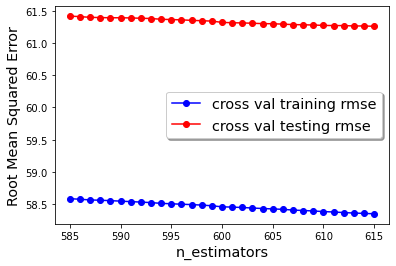

In [19]:
n_range = range(585,616)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in n_range:
    xgb = XGBRegressor(random_state = 6, n_estimators = d, max_depth = 2 , min_child_weight = 5, gamma = 0.01,
                       learning_rate = 0.016, subsample = 0.6, colsample_bytree = 0.7, objective = 'reg:squarederror')
    xgb.fit(x_train, y_train.ravel()) 
    train_acc.append(sqrt(mean_squared_error(xgb.predict(x_train), y_train.ravel())))
    test_acc.append(sqrt(mean_squared_error(xgb.predict(x_test), y_test.ravel())))
    
    results  = cross_validate(xgb, x_list, y_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))

plt.plot(n_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(n_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('n_estimators', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [117]:
xgb = XGBRegressor(random_state = 6, n_estimators = 605, max_depth = 2, min_child_weight = 5, gamma = 0.01,
                   learning_rate = 0.016, subsample = 0.6, colsample_bytree = 0.7, objective = 'reg:squarederror')
xgb.fit(x_train, y_train.ravel()) 
results  = cross_validate(xgb, x_list, y_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

cross val training root mean squared error (RMSE) is: 58.42615140315477
cross val testing root mean squared error (RMSE) is: 61.29473937295906


Scaling

In [20]:
# Load dataset into a DataFrame
df = pd.read_csv('listings_new.csv')

# Create a copy of the DataFrame
df_scaled_list = df.copy()

# Show overview of the dataset
df_scaled_list.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,7,1.33235,103.78521,2,81,2.0,18,1,0.28,1,365
1,14,1.28875,103.80814,2,44,15.0,18,1,0.23,32,331
2,14,1.28837,103.81099,2,40,2.0,10,1,0.11,32,276
3,6,1.31125,103.83816,2,65,2.0,125,1,1.35,6,336
4,14,1.28976,103.80896,2,44,2.0,13,1,0.15,32,340


In [31]:
df_scaled_list["neighbourhood"] = (df_scaled_list["neighbourhood"] - df_scaled_list["neighbourhood"].min()) / (df_scaled_list["neighbourhood"].max()-df_scaled_list["neighbourhood"].min())
df_scaled_list["latitude"] = (df_scaled_list["latitude"] - df_scaled_list["latitude"].min()) / (df_scaled_list["latitude"].max()-df_scaled_list["latitude"].min())
df_scaled_list["longitude"] = (df_scaled_list["longitude"] - df_scaled_list["longitude"].min()) / (df_scaled_list["longitude"].max()-df_scaled_list["longitude"].min())
df_scaled_list["room_type"] = (df_scaled_list["room_type"] - df_scaled_list["room_type"].min()) / (df_scaled_list["room_type"].max()-df_scaled_list["room_type"].min())
df_scaled_list["minimum_nights"] = (df_scaled_list["minimum_nights"] - df_scaled_list["minimum_nights"].min()) / (df_scaled_list["minimum_nights"].max()-df_scaled_list["minimum_nights"].min())
df_scaled_list["number_of_reviews"] = (df_scaled_list["number_of_reviews"] - df_scaled_list["number_of_reviews"].min()) / (df_scaled_list["number_of_reviews"].max()-df_scaled_list["number_of_reviews"].min())
df_scaled_list["reviews_per_month"] = (df_scaled_list["reviews_per_month"] - df_scaled_list["reviews_per_month"].min()) / (df_scaled_list["reviews_per_month"].max()-df_scaled_list["reviews_per_month"].min())
df_scaled_list["calculated_host_listings_count"] = (df_scaled_list["calculated_host_listings_count"]
                                                    - df_scaled_list["calculated_host_listings_count"].min()) / (df_scaled_list["calculated_host_listings_count"].max()
                                                                                                                 -df_scaled_list["calculated_host_listings_count"].min())
df_scaled_list["availability_365"] = (df_scaled_list["availability_365"] - df_scaled_list["availability_365"].min()) / (df_scaled_list["availability_365"].max()-df_scaled_list["availability_365"].min())

y_scaled_list = df_scaled_list['price']
x_scaled_list = df_scaled_list.drop(['price'], axis = 1)

x_scaled_train, x_scaled_test, y_scaled_train, y_scaled_test = train_test_split(x_scaled_list, y_scaled_list, test_size=0.33, random_state=6)
#test data

In [94]:
xgb = XGBRegressor(random_state = 6, n_estimators = 605, max_depth = 2, min_child_weight = 5, gamma = 0.01, learning_rate = 0.016, subsample = 0.6, colsample_bytree = 0.7, objective = 'reg:squarederror')
xgb.fit(x_scaled_train, y_scaled_train.ravel()) 
results  = cross_validate(xgb, x_scaled_list, y_scaled_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

cross val training root mean squared error (RMSE) is: 58.42496523830495
cross val testing root mean squared error (RMSE) is: 61.293259231792376


In [95]:
# Create Random Forest Model
rf_reg = RandomForestRegressor(random_state = 6, n_jobs=-1, max_features = 'log2', min_samples_split = 5, min_samples_leaf = 64, max_depth = 25, n_estimators = 950)
# Y_train is a 1D array, use ravel() to change the shape of Y_train to (n_samples,) before feed it into fit function
rf_reg.fit(x_scaled_train, y_scaled_train.ravel()) 
results  = (cross_validate(rf_reg, x_scaled_list, y_scaled_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True))
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-59.17004578 -58.29223778 -57.99243611 -57.53313031 -57.7738465 ]
test_score:  [-55.84544261 -61.75199573 -61.80141066 -64.61443343 -63.91795009]
cross val training root mean squared error (RMSE) is: 58.15233929490292
cross val testing root mean squared error (RMSE) is: 61.58624650534485


ANN
1. The number of hidden neurons should be between the size of the input layer and the size of the output layer.

2. The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.

3. The number of hidden neurons should be less than twice the size of the input layer.


In [190]:
mlp = MLPRegressor(random_state =6)
mlp.fit(x_scaled_train,y_scaled_train.ravel())

F:\school\anaconda\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(random_state=6)

In [191]:
# Evaluate the Model using K-folds Cross validation
results  = (cross_validate(mlp, x_scaled_list, y_scaled_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True))
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

F:\school\anaconda\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\school\anaconda\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\school\anaconda\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\school\anaconda\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

train_score:  [-67.07410834 -66.37183822 -65.51430329 -64.72581086 -65.20435275]
test_score:  [-61.03418791 -63.81891127 -67.05481559 -71.20087212 -68.74035743]
cross val training root mean squared error (RMSE) is: 65.77808269426974
cross val testing root mean squared error (RMSE) is: 66.36982886428933


F:\school\anaconda\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


SVM

In [222]:
svr = SVR()
svr.fit(x_scaled_train,y_scaled_train.ravel())
results  = (cross_validate(svr, x_scaled_list, y_scaled_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True))
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-71.12843927 -70.00197491 -69.84822406 -68.64577718 -68.9850575 ]
test_score:  [-61.6222284  -67.78585363 -73.08390845 -73.12715125 -76.23853057]
cross val training root mean squared error (RMSE) is: 69.7218945844784
cross val testing root mean squared error (RMSE) is: 70.37153446111486


In [145]:
svr = SVR()

param_grid = { "C" : [1,10,100,1000],
              "kernel": ['rbf','poly','sigmoid'],
              "epsilon": [0.01,0.1,0.5,1,2]}


gs = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(x_scaled_list, y_scaled_list)
print(gs.best_score_)
print(gs.best_params_)

-63.68808185436524
{'C': 1000, 'epsilon': 2, 'kernel': 'rbf'}


In [34]:
svr = SVR(kernel = 'rbf')

param_grid = { "C" : [700,1000,1300],
              'epsilon': [2,4,6,8],
              'gamma': [1000,100,10,1,0.1,0.01,0.001,0.0001,'scale','auto']}


gs = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(x_scaled_list, y_scaled_list)
print(gs.best_score_)
print(gs.best_params_)

-62.81965155090334
{'C': 1000, 'epsilon': 8, 'gamma': 1}


In [224]:
svr = SVR(kernel = 'rbf')

param_grid = { "C" : [850,900,950,1000,1050,1100,1150],
              'epsilon': [8,10,15,20],
              'gamma': [0.5,1,3,5,7]}


gs = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(x_scaled_list, y_scaled_list)
print(gs.best_score_)
print(gs.best_params_)

-61.68482330667848
{'C': 850, 'epsilon': 20, 'gamma': 3}


In [17]:
svr = SVR(kernel = 'rbf', gamma = 3)

param_grid = { "C" : [700,750,800,850,900,950],
              'epsilon': [18,20,23,26]}


gs = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(x_scaled_list, y_scaled_list)
print(gs.best_score_)
print(gs.best_params_)

-61.061422720896964
{'C': 700, 'epsilon': 26}


In [19]:
svr = SVR(kernel = 'rbf', gamma = 3)

param_grid = { "C" : [200,250,300,350,400,450,500,550,600,650,700],
              'epsilon': [26,30,34,38]}


gs = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(x_scaled_list, y_scaled_list)
print(gs.best_score_)
print(gs.best_params_)

-60.2713457483557
{'C': 200, 'epsilon': 34}


In [20]:
svr = SVR(kernel = 'rbf', gamma = 3, epsilon = 34)

param_grid = { "C" : [170,180,190,200,210,220,230]}


gs = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(x_scaled_list, y_scaled_list)
print(gs.best_score_)
print(gs.best_params_)

-60.2713457483557
{'C': 200}


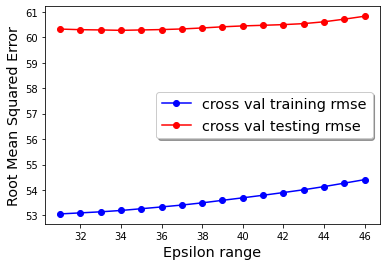

In [42]:
epsilon_range = range(31,47)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in epsilon_range:
    svr = SVR(kernel = 'rbf', C = 200, epsilon = d, gamma = 3)
    svr.fit(x_scaled_train, y_scaled_train.ravel()) 
    train_acc.append(sqrt(mean_squared_error(svr.predict(x_scaled_train), y_scaled_train.ravel())))
    test_acc.append(sqrt(mean_squared_error(svr.predict(x_scaled_test), y_scaled_test.ravel())))
    
    results  = cross_validate(svr, x_scaled_list, y_scaled_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))

plt.plot(epsilon_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(epsilon_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('Epsilon range', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [50]:
svr = SVR(C = 200, kernel = 'rbf', epsilon = 44, gamma = 1.5)
svr.fit(x_scaled_train,y_scaled_train.ravel())
results  = (cross_validate(svr, x_scaled_list, y_scaled_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True))
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-58.44437022 -57.46957187 -56.84222724 -56.51554795 -56.83787937]
test_score:  [-55.35502892 -60.34011935 -63.15673398 -63.76361944 -63.888818  ]
cross val training root mean squared error (RMSE) is: 57.22191933073917
cross val testing root mean squared error (RMSE) is: 61.30086393679319


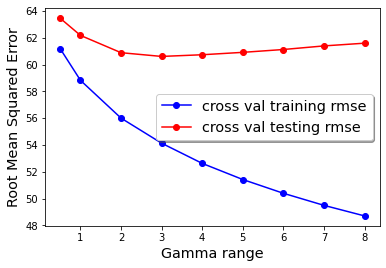

In [44]:
gamma_range = [0.5,1,2,3,4,5,6,7,8]

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in gamma_range:
    svr = SVR(kernel = 'rbf', C = 200, epsilon = 44, gamma = d)
    svr.fit(x_scaled_train, y_scaled_train.ravel()) 
    train_acc.append(sqrt(mean_squared_error(svr.predict(x_scaled_train), y_scaled_train.ravel())))
    test_acc.append(sqrt(mean_squared_error(svr.predict(x_scaled_test), y_scaled_test.ravel())))
    
    results  = cross_validate(svr, x_scaled_list, y_scaled_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))

plt.plot(gamma_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(gamma_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('Gamma range', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [59]:
svr = SVR(kernel = 'rbf', gamma = 1.5, epsilon = 44)

param_grid = {"C" : [200,250,300,350,400,450,500,550,600,650,700]}


gs = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(x_scaled_list, y_scaled_list)
print(gs.best_score_)
print(gs.best_params_)

-60.89095134726838
{'C': 600}


In [60]:
svr = SVR(kernel = 'rbf', gamma = 1.5, epsilon = 44)

param_grid = {"C" : [580,590,600,610,620,630]}


gs = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(x_scaled_list, y_scaled_list)
print(gs.best_score_)
print(gs.best_params_)

-60.888909713110706
{'C': 580}


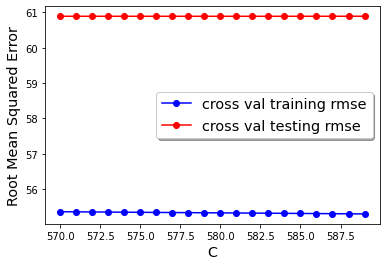

In [46]:
C_range = range(570,590)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in C_range:
    svr = SVR(kernel = 'rbf', C = d, epsilon = 44, gamma = 1.5)
    svr.fit(x_scaled_train, y_scaled_train.ravel()) 
    train_acc.append(sqrt(mean_squared_error(svr.predict(x_scaled_train), y_scaled_train.ravel())))
    test_acc.append(sqrt(mean_squared_error(svr.predict(x_scaled_test), y_scaled_test.ravel())))
    
    results  = cross_validate(svr, x_scaled_list, y_scaled_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))

plt.plot(C_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(C_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('C', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [63]:
svr = SVR(kernel = 'rbf', gamma = 1.5, epsilon = 44)

param_grid = {"C" : range(570,590)}


gs = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(x_scaled_list, y_scaled_list)
print(gs.best_score_)
print(gs.best_params_)

-60.888898252855824
{'C': 582}


In [35]:
svr = SVR(C = 582, kernel = 'rbf', epsilon = 44, gamma = 1.5)
svr.fit(x_scaled_train,y_scaled_train.ravel())
results  = (cross_validate(svr, x_scaled_list,
                           y_scaled_list.ravel(),
                           scoring='neg_root_mean_squared_error',
                           cv=5,
                           return_train_score = True))
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-56.42628217 -55.81600606 -54.97658656 -54.59543424 -54.80344615]
test_score:  [-55.94894562 -58.79350155 -62.88742932 -62.9143486  -63.90026616]
cross val training root mean squared error (RMSE) is: 55.32355103764316
cross val testing root mean squared error (RMSE) is: 60.888898252855824


P Value

In [18]:
lm2 = sm.OLS(y_train, x_train).fit()
# Summary statistics from the model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.841
Model:                            OLS   Adj. R-squared (uncentered):              0.840
Method:                 Least Squares   F-statistic:                              2115.
Date:                Fri, 29 Jan 2021   Prob (F-statistic):                        0.00
Time:                        00:03:51   Log-Likelihood:                         -22577.
No. Observations:                4015   AIC:                                  4.517e+04
Df Residuals:                    4005   BIC:                                  4.524e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
neighbourhood                     -1.2410      0.250     -4.955      0.000      -1.732      -0.750
latitude                         -45.8492     66.420     -0.690      0.490    -176.070      84.371
longitude                         -0.0868      0.829     -0.105      0.917      -1.713       1.539
room_type                         89.5985      1.889     47.444      0.000      85.896      93.301
minimum_nights                    -1.8405      0.258     -7.130      0.000      -2.347      -1.334
number_of_reviews                 -0.3073      0.050     -6.188      0.000      -0.405      -0.210
last_review                       -7.5250      2.508     -3.001      0.003     -12.442      -2.608
reviews_per_month                  6.8120      1.336      5.100      0.000       4.193       9.431
calculated_host_listings_count    -0.0496      0.018     -2.789      0.005      -0.084      -0.015
availability_365                   0.0874      0.008     11.185      0.000       0.072       0.103
==============================================================================
Omnibus:                      582.224   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              893.747
Skew:                           1.026   Prob(JB):                    8.42e-195
Kurtosis:                       4.064   Cond. No.                     1.73e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
lm2 = sm.OLS(y_scaled_train, x_scaled_train).fit()
# Summary statistics from the model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.840
Model:                            OLS   Adj. R-squared (uncentered):              0.840
Method:                 Least Squares   F-statistic:                              2108.
Date:                Fri, 29 Jan 2021   Prob (F-statistic):                        0.00
Time:                        00:03:53   Log-Likelihood:                         -22583.
No. Observations:                4015   AIC:                                  4.519e+04
Df Residuals:                    4005   BIC:                                  4.525e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
neighbourhood                    -16.5908      4.844     -3.425      0.001     -26.087      -7.095
latitude                           8.3881      7.382      1.136      0.256      -6.085      22.861
longitude                          2.6726      7.348      0.364      0.716     -11.734      17.079
room_type                        184.9095      3.413     54.171      0.000     178.217     191.602
minimum_nights                   -39.3261      5.427     -7.247      0.000     -49.965     -28.687
number_of_reviews                -94.3429     15.283     -6.173      0.000    -124.306     -64.380
last_review                       -5.1827      2.417     -2.144      0.032      -9.922      -0.444
reviews_per_month                 87.1668     17.401      5.009      0.000      53.052     121.282
calculated_host_listings_count   -16.3265      4.801     -3.400      0.001     -25.740      -6.913
availability_365                  35.1437      2.697     13.029      0.000      29.855      40.432
==============================================================================
Omnibus:                      570.997   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              874.850
Skew:                           1.008   Prob(JB):                    1.07e-190
Kurtosis:                       4.080   Cond. No.                         31.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
x_new = df_list.drop(['latitude','longitude','price'], axis = 1)
x_scaled_new = df_scaled_list.drop(['latitude','longitude','price'], axis = 1)

In [23]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y_list, test_size=0.33, random_state=6)
x_scaled_train_new, x_scaled_test_new, y_scaled_train_new, y_scaled_test_new = train_test_split(x_scaled_new, y_scaled_list, test_size=0.33, random_state=6)
#test data
x_scaled_new.head()

,neighbourhood,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0.333333,0.5,0.047619,0.058632,1,0.021538,0.000000,1.000000
1,0.722222,0.5,0.666667,0.058632,1,0.017692,0.113553,0.906849
2,0.722222,0.5,0.047619,0.032573,1,0.008462,0.113553,0.756164
3,0.277778,0.5,0.047619,0.407166,1,0.103846,0.018315,0.920548
4,0.722222,0.5,0.047619,0.042345,1,0.011538,0.113553,0.931507


SVM

In [24]:
svr = SVR(C = 582, kernel = 'rbf', epsilon = 44, gamma = 1.5)
svr.fit(x_scaled_train_new,y_scaled_train_new.ravel())
results  = (cross_validate(svr, x_scaled_new, y_scaled_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True))
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-61.29562998 -60.10624063 -59.30886017 -58.87055994 -59.49166475]
test_score:  [-57.90797346 -63.43142203 -66.06398028 -67.07772291 -65.50181224]
cross val training root mean squared error (RMSE) is: 59.814591095329305
cross val testing root mean squared error (RMSE) is: 63.99658218207255


XGB

In [25]:
xgb = XGBRegressor(random_state = 6, n_estimators = 605, max_depth = 2, min_child_weight = 5, gamma = 0.01, learning_rate = 0.016,
                   subsample = 0.6, colsample_bytree = 0.7, objective = 'reg:squarederror')
xgb.fit(x_train_new, y_train_new.ravel()) 
results  = cross_validate(xgb, x_new, y_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

cross val training root mean squared error (RMSE) is: 59.70274100959866
cross val testing root mean squared error (RMSE) is: 62.06335246904015


RF

In [26]:
# Create Random Forest Model
rf_reg = RandomForestRegressor(random_state = 6, n_jobs=-1, max_features = 'log2', min_samples_split = 5, min_samples_leaf = 64,
                               max_depth = 25, n_estimators = 950)
# Y_train is a 1D array, use ravel() to change the shape of Y_train to (n_samples,) before feed it into fit function
rf_reg.fit(x_train_new, y_train_new.ravel())
results  = (cross_validate(rf_reg, x_new, y_list.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True))
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-60.24001261 -59.44287861 -59.03068597 -58.28158138 -58.77366611]
test_score:  [-56.68090771 -61.91677678 -62.64030361 -65.76980853 -64.32385478]
cross val training root mean squared error (RMSE) is: 59.15376493578265
cross val testing root mean squared error (RMSE) is: 62.26633028174329
